In [10]:
import os
import datetime as dt
import pandas as pd
import sqlite3 as lite

In [11]:
pd.set_option('display.width', 160)

In [12]:
%matplotlib inline
import matplotlib.pyplot as pyplt
pyplt.rcParams['figure.figsize'] = (24, 5)

In [13]:
now_dt = dt.datetime.now()
# strdate = '20190719'
# strdate2 = '2019-07-19'
strdate = now_dt.strftime('%Y%m%d')
strdate2 = now_dt.strftime('%Y-%m-%d')

In [15]:
pjt_path = os.path.dirname(os.getcwd())
target_db = pjt_path + '/DataLoader/dataloader/TAQ_Data/TAQ_%s.db' % strdate
conn = lite.connect(target_db)
sqltext = "SELECT * FROM TickData WHERE securitiestype = 'futures' AND feedsource = 'xing' AND datetime > '%s' AND datetime < '%s'" % (strdate2 + ' 09:00:00', strdate2 + ' 17:00:00')
# sqltext = "SELECT * FROM FutOptTickData WHERE SecuritiesType = 'futures' AND FeedSource = 'cybos'"
df = pd.read_sql(sqltext, conn)
df = df[['shortcd', 'taq', 'datetime', 'buysell', 'lastprice', 'lastqty', 'askqty1', 'ask1', 'bid1', 'bidqty1']]
print len(df)

63337


In [16]:
pjt_path = os.path.dirname(os.getcwd())
target_db = pjt_path + '/DataLoader/dataloader/TAQ_Data/TAQ_%s_new.db' % strdate
conn = lite.connect(target_db)
sqltext = "SELECT * FROM TickData WHERE securitiestype = 'futures' AND feedsource = 'xing' AND datetime > '%s' AND datetime < '%s'" % (strdate2 + ' 09:00:00', strdate2 + ' 17:00:00')
# sqltext = "SELECT * FROM FutOptTickData WHERE SecuritiesType = 'futures' AND FeedSource = 'cybos'"
df_new = pd.read_sql(sqltext, conn)
df_new = df_new[['shortcd', 'taq', 'datetime', 'buysell', 'lastprice', 'lastqty', 'askqty1', 'ask1', 'bid1', 'bidqty1']]
print len(df_new)

23553


In [17]:
sqltext = """
SELECT 
DISTINCT(shortcd) 
FROM TickData 
WHERE 
SecuritiesType = 'futures' AND 
-- FeedSource = 'cybos' AND 
FeedSource = 'xing' AND 
shortcd LIKE '101%' 
ORDER BY shortcd
"""
df_big_shortcd = pd.read_sql(sqltext, conn)
sqltext = """
SELECT 
DISTINCT(shortcd) 
FROM TickData 
WHERE 
SecuritiesType = 'futures' AND 
-- FeedSource = 'cybos' AND 
FeedSource = 'xing' AND 
shortcd LIKE '105%' 
ORDER BY shortcd 
"""
df_mini_shortcd = pd.read_sql(sqltext, conn)
big_shortcd = df_big_shortcd['shortcd'].iloc[0]
mini_shortcd = df_mini_shortcd['shortcd'].iloc[0]
# big_shortcd = '101M6000'
# mini_shortcd = '105M5000'
print big_shortcd, mini_shortcd

101P9000 105P8000


In [36]:
df.iloc[5:20]

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1
5,101PC000,Q,2019-08-06 09:00:13.353000,None,NaN,NaN,0.0,0.00,0.00,0.0
6,105P8000,T,2019-08-06 09:00:16.431000,B,251.04,62.0,NaN,0.00,0.00,NaN
7,105P9000,T,2019-08-06 09:00:16.556000,B,251.96,26.0,NaN,0.00,0.00,NaN
8,101P9000,T,2019-08-06 09:00:16.696000,,251.10,3454.0,NaN,0.00,0.00,NaN
9,101PC000,T,2019-08-06 09:00:16.806000,,251.30,4.0,NaN,0.00,0.00,NaN
10,101P9000,T,2019-08-06 09:00:24.259000,S,251.15,1.0,NaN,251.25,251.10,NaN
11,101P9000,T,2019-08-06 09:00:24.321000,B,251.25,1.0,NaN,251.25,251.20,NaN
12,101P9000,T,2019-08-06 09:00:24.431000,S,251.20,1.0,NaN,251.25,251.20,NaN
13,101P9000,T,2019-08-06 09:00:24.493000,B,251.25,1.0,NaN,251.25,251.20,NaN
14,101P9000,T,2019-08-06 09:00:24.603000,B,251.25,1.0,NaN,251.25,251.20,NaN


In [33]:
df_new.iloc[75:90]

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1
75,101P9000,Q,2019-08-06 09:01:12.289000,None,NaN,NaN,0.0,0.00,0.00,0.0
76,101PC000,Q,2019-08-06 09:01:12.398000,None,NaN,NaN,0.0,0.00,0.00,0.0
77,105P8000,T,2019-08-06 09:01:17.671000,B,251.04,62.0,NaN,0.00,0.00,NaN
78,105P9000,T,2019-08-06 09:01:17.780000,B,251.96,26.0,NaN,0.00,0.00,NaN
79,101P9000,T,2019-08-06 09:01:19.153000,B,251.75,2.0,NaN,251.75,251.70,NaN
80,101P9000,T,2019-08-06 09:01:21.384000,S,251.70,15.0,NaN,251.70,251.65,NaN
81,101P9000,Q,2019-08-06 09:01:22.382000,None,NaN,NaN,7.0,251.70,251.65,34.0
82,105P8000,Q,2019-08-06 09:01:22.492000,None,NaN,NaN,8.0,251.48,251.34,12.0
83,105P9000,Q,2019-08-06 09:01:22.585000,None,NaN,NaN,10.0,252.44,251.32,4.0
84,101P9000,T,2019-08-06 09:01:25.924000,S,251.65,5.0,NaN,251.70,251.65,NaN


In [40]:
df_big = df[df['shortcd'] == big_shortcd]
df_mini = df[df['shortcd'] == mini_shortcd]

In [52]:
df_big.iloc[:15]

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1
0,101P9000,Q,2019-08-06 09:00:05.103000,None,NaN,NaN,0.0,0.00,0.00,0.0
1,101P9000,Q,2019-08-06 09:00:08.103000,None,NaN,NaN,0.0,0.00,0.00,0.0
2,101P9000,Q,2019-08-06 09:00:10.071000,None,NaN,NaN,0.0,0.00,0.00,0.0
4,101P9000,Q,2019-08-06 09:00:13.290000,None,NaN,NaN,0.0,0.00,0.00,0.0
8,101P9000,T,2019-08-06 09:00:16.696000,,251.10,3454.0,NaN,0.00,0.00,NaN
10,101P9000,T,2019-08-06 09:00:24.259000,S,251.15,1.0,NaN,251.25,251.10,NaN
11,101P9000,T,2019-08-06 09:00:24.321000,B,251.25,1.0,NaN,251.25,251.20,NaN
12,101P9000,T,2019-08-06 09:00:24.431000,S,251.20,1.0,NaN,251.25,251.20,NaN
13,101P9000,T,2019-08-06 09:00:24.493000,B,251.25,1.0,NaN,251.25,251.20,NaN
14,101P9000,T,2019-08-06 09:00:24.603000,B,251.25,1.0,NaN,251.25,251.20,NaN


In [42]:
df_new_big = df_new[df_new['shortcd'] == big_shortcd]
df_new_mini = df_new[df_new['shortcd'] == mini_shortcd]

In [51]:
df_new_big.iloc[40:55]

,shortcd,taq,datetime,buysell,lastprice,lastqty,askqty1,ask1,bid1,bidqty1
58,101P9000,Q,2019-08-06 09:00:51.635000,None,NaN,NaN,0.0,0.00,0.00,0.0
60,101P9000,Q,2019-08-06 09:00:54.724000,None,NaN,NaN,0.0,0.00,0.00,0.0
61,101P9000,Q,2019-08-06 09:00:55.894000,None,NaN,NaN,0.0,0.00,0.00,0.0
64,101P9000,Q,2019-08-06 09:00:57.438000,None,NaN,NaN,0.0,0.00,0.00,0.0
65,101P9000,Q,2019-08-06 09:00:58.670000,None,NaN,NaN,0.0,0.00,0.00,0.0
67,101P9000,Q,2019-08-06 09:01:00.215000,None,NaN,NaN,0.0,0.00,0.00,0.0
69,101P9000,Q,2019-08-06 09:01:02.477000,None,NaN,NaN,0.0,0.00,0.00,0.0
71,101P9000,Q,2019-08-06 09:01:03.491000,None,NaN,NaN,0.0,0.00,0.00,0.0
73,101P9000,Q,2019-08-06 09:01:07.250000,None,NaN,NaN,0.0,0.00,0.00,0.0
75,101P9000,Q,2019-08-06 09:01:12.289000,None,NaN,NaN,0.0,0.00,0.00,0.0


In [7]:
# df['datetime'] = strdate2 + ' ' + df['Time']
df['datetime'] = pd.to_datetime(df['datetime'])
df.index = df['datetime']
# del df['datetime']
# del df['time']
df['mid'] = (df['bid1'].astype(float) + df['ask1'].astype(float)) * 0.5
df = df[df['mid'] > 0]

In [8]:
df_big = df[df['shortcd'] == big_shortcd]
df_mini = df[df['shortcd'] == mini_shortcd]
# df_big = df_big.loc[df_big.index.drop_duplicates()]
# df_mini = df_mini.loc[df_mini.index.drop_duplicates()]
df_big = df_big.reset_index(drop=True)
df_mini = df_mini.reset_index(drop=True)

# print df_big.head(20)
# print  df_mini.head(20)
print len(df_big), len(df_mini)

# df_total = pd.concat([df_big, df_mini], axis=1, sort=False)
# print df_total.head()

df_total = pd.merge(df_big, df_mini,how='outer', on='datetime')
df_total.index = df_total['datetime']
df_total = df_total.sort_index()
del df_total['datetime']
print df_total.head(20)

41071 30907
                        shortcd_x taq_x buysell_x  lastprice_x  lastqty_x  askqty1_x  ask1_x  bid1_x  bidqty1_x    mid_x shortcd_y taq_y buysell_y  \
datetime                                                                                                                                             
2019-07-16 09:00:18.492  101P9000     T                 273.50      892.0        NaN  273.50  273.45        NaN  273.475       NaN   NaN       NaN   
2019-07-16 09:00:18.523  101P9000     T         S       273.45        1.0        NaN  273.50  273.45        NaN  273.475       NaN   NaN       NaN   
2019-07-16 09:00:18.586  101P9000     T         B       273.50        2.0        NaN  273.50  273.45        NaN  273.475       NaN   NaN       NaN   
2019-07-16 09:00:18.617  101P9000     T         B       273.50       18.0        NaN  273.50  273.45        NaN  273.475       NaN   NaN       NaN   
2019-07-16 09:00:18.633  101P9000     T         B       273.55       26.0        NaN  27

In [9]:
new_columns = ['Big_ShortCD', 'Big_TAQ', 'Big_BuySell', 'Big_LastPrice', 'Big_LastQty', 'Big_AskQty1', 'Big_Ask1', 'Big_Bid1', 'Big_BidQty1', 'Big_mid', 
				'Mini_ShortCD', 'Mini_TAQ', 'Mini_BuySell', 'Mini_LastPrice', 'Mini_LastQty', 'Mini_AskQty1', 'Mini_Ask1', 'Mini_Bid1', 'Mini_BidQty1', 'Mini_mid',]
new_columns = [item.lower() for item in new_columns]
df_total.columns = new_columns
df_total = df_total.ffill()
df_total['mid_diff'] = df_total['big_mid'] - df_total['mini_mid']
df_total_liquid = df_total[df_total['mini_ask1'].astype(float) - df_total['mini_bid1'].astype(float) <= 0.04]

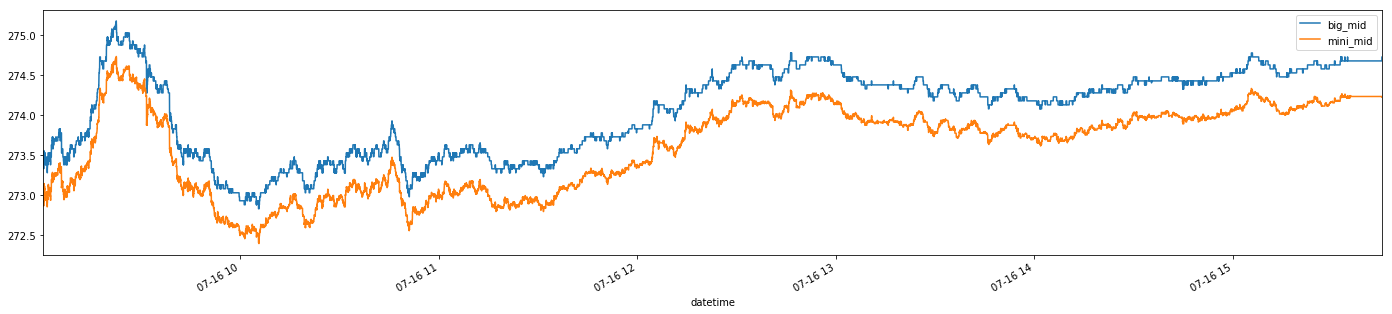

In [10]:
df_total[['big_mid', 'mini_mid']].plot()

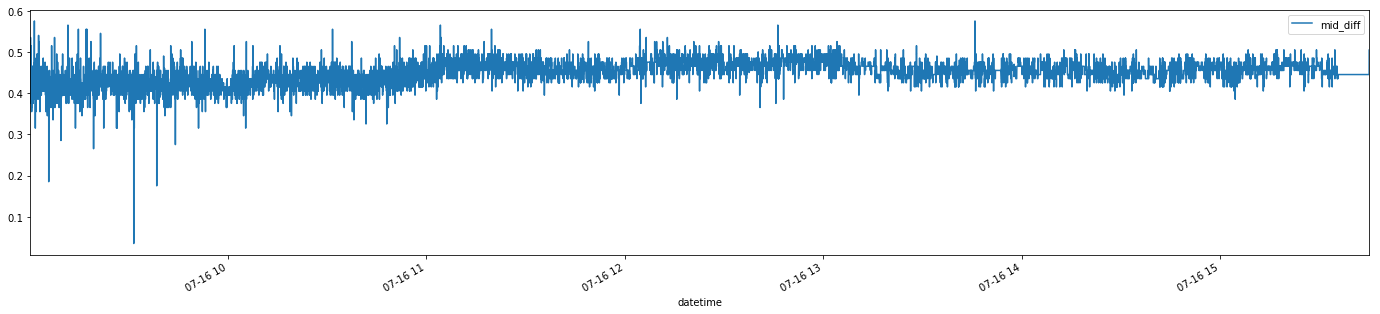

In [11]:
df_total[['mid_diff']].plot()

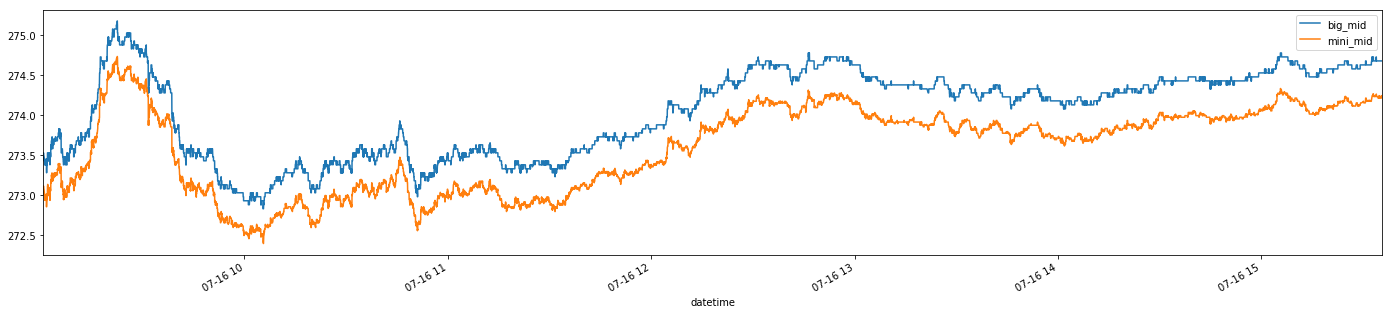

In [12]:
df_total_liquid[['big_mid', 'mini_mid']].plot()

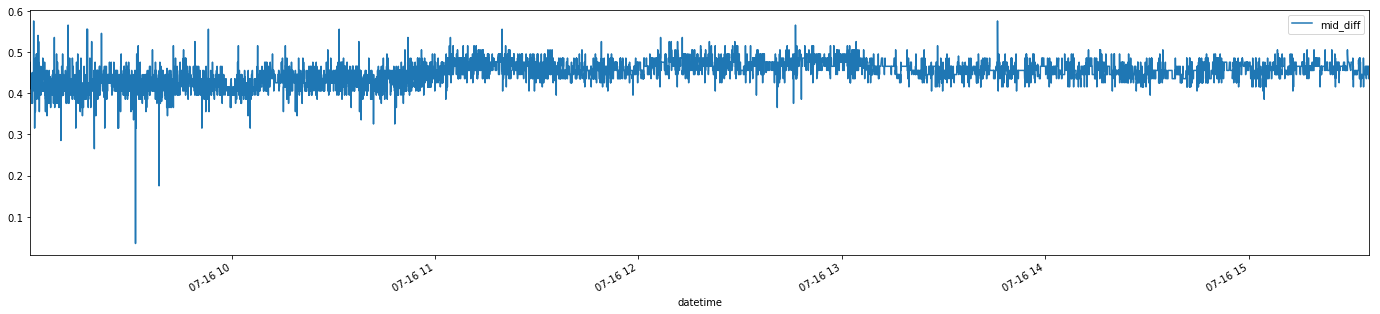

In [13]:
df_total_liquid[['mid_diff']].plot()

In [14]:
print df_total.iloc[1:][['big_mid', 'mini_mid', 'mid_diff']].describe()

            big_mid      mini_mid      mid_diff
count  70026.000000  70016.000000  70016.000000
mean     274.026527    273.577221      0.449384
std        0.538983      0.531661      0.024866
min      272.825000    272.390000      0.035000
25%      273.525000    273.070000      0.435000
50%      274.225000    273.750000      0.455000
75%      274.475000    274.010000      0.465000
max      275.175000    274.730000      0.575000


In [15]:
print df_total_liquid.iloc[1:][['big_mid', 'mini_mid', 'mid_diff']].describe()

            big_mid      mini_mid      mid_diff
count  56424.000000  56424.000000  56424.000000
mean     274.020682    273.571185      0.449497
std        0.533980      0.526570      0.025118
min      272.825000    272.390000      0.035000
25%      273.525000    273.070000      0.435000
50%      274.225000    273.750000      0.455000
75%      274.425000    273.990000      0.465000
max      275.175000    274.730000      0.575000
